### 🧪 COVID-19 Global Data Tracker

## Step 1: Data Collection

In this step, we collect COVID-19 data from a reliable source. We will use the **Our World in Data** (OWID) dataset which provides global data in CSV format.

You can download the dataset here:  
🔗 https://covid.ourworldindata.org/data/owid-covid-data.csv

Save the file as `owid-covid-data.csv` in your working directory.

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('owid-covid-data.csv')

# Preview the data
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


## Step 2: Data Loading & Exploration

We will load the dataset using pandas, explore its structure, check for missing values, and understand the key columns available for analysis.

In [3]:
# Display column names
print(df.columns)

# Check shape of the dataset
print("Shape of dataset:", df.shape)

# Check for missing values
df.isnull().sum()

# Preview sample data
df.head()

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


## Step 3: Data Cleaning

Before analyzing the data, we need to clean it:
- Convert the `date` column to datetime.
- Filter countries of interest (e.g., Kenya, India, USA).
- Drop rows with missing critical values like `date` and `total_cases`.
- Fill missing values using forward fill.

In [4]:
df['date'] = pd.to_datetime(df['date'])

countries = ['Kenya', 'India', 'United States']
df_filtered = df[df['location'].isin(countries)]

df_filtered = df_filtered.dropna(subset=['date', 'total_cases'])
df_filtered = df_filtered.fillna(method='ffill')

df_filtered.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_25964\3247560799.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered = df_filtered.fillna(method='ffill')


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
173549,IND,Asia,India,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173550,IND,Asia,India,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173551,IND,Asia,India,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173552,IND,Asia,India,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173553,IND,Asia,India,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN


## Step 4: Exploratory Data Analysis (EDA)

Now we analyze trends over time:
- Total COVID-19 cases
- New daily cases
- Death rates

We use line plots to compare trends across selected countries.

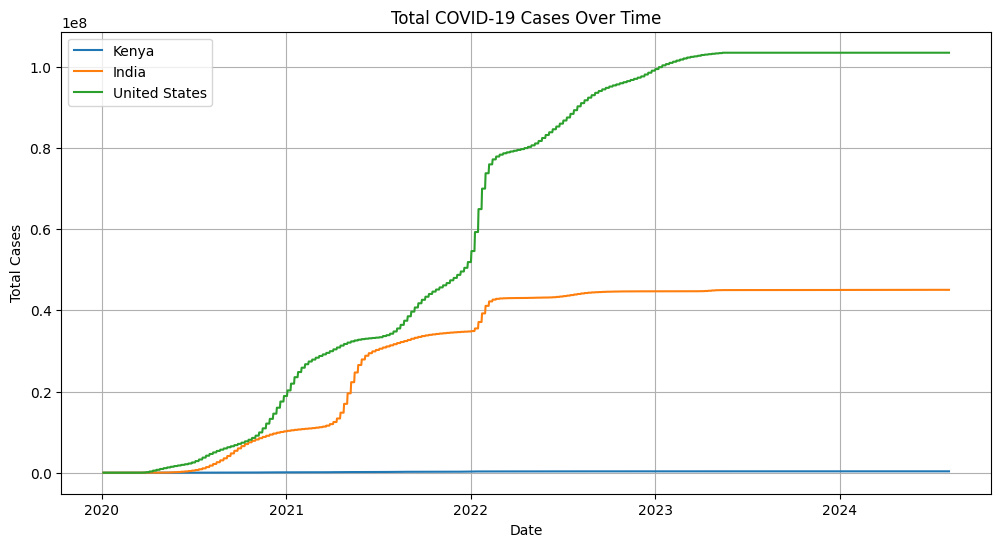

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total cases over time
plt.figure(figsize=(12,6))
for country in countries:
    data = df_filtered[df_filtered['location'] == country]
    plt.plot(data['date'], data['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid()
plt.show()

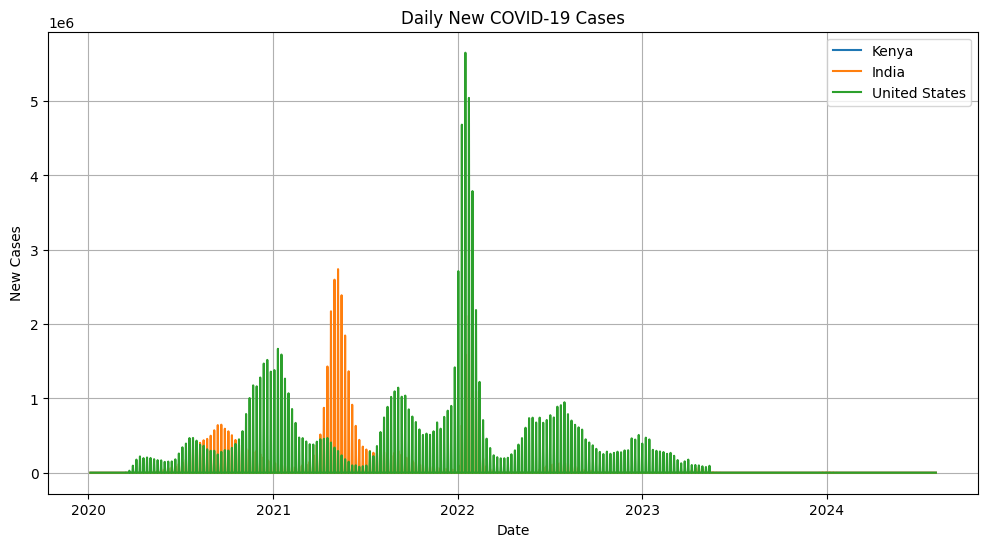

In [6]:
# Daily new cases
plt.figure(figsize=(12,6))
for country in countries:
    data = df_filtered[df_filtered['location'] == country]
    plt.plot(data['date'], data['new_cases'], label=country)
plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid()
plt.show()

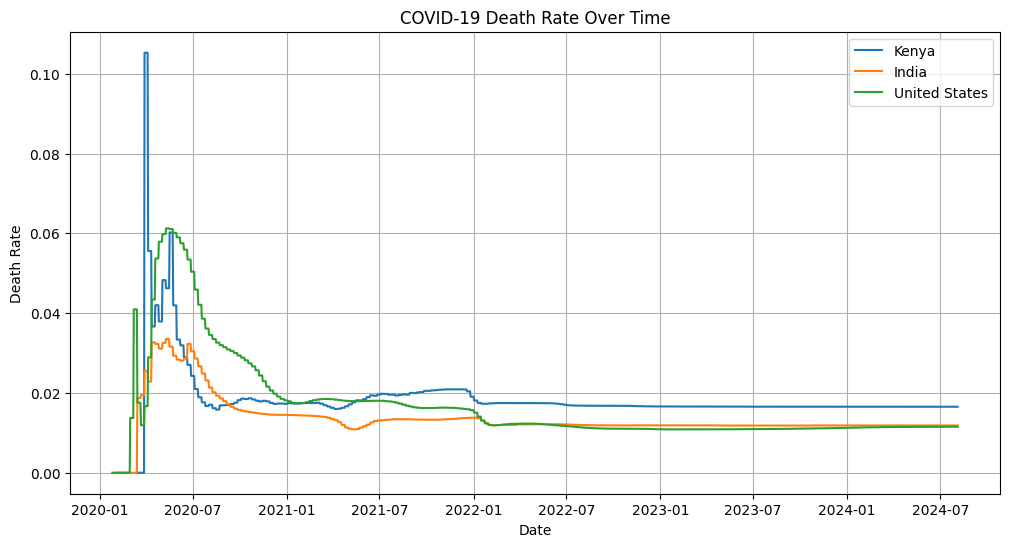

In [7]:
# Death rate = total_deaths / total_cases
df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases']

plt.figure(figsize=(12,6))
for country in countries:
    data = df_filtered[df_filtered['location'] == country]
    plt.plot(data['date'], data['death_rate'], label=country)
plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.grid()
plt.show()

## Step 5: Visualizing Vaccination Progress

We now analyze vaccination trends:
- Cumulative vaccinations over time
- Comparison across selected countries

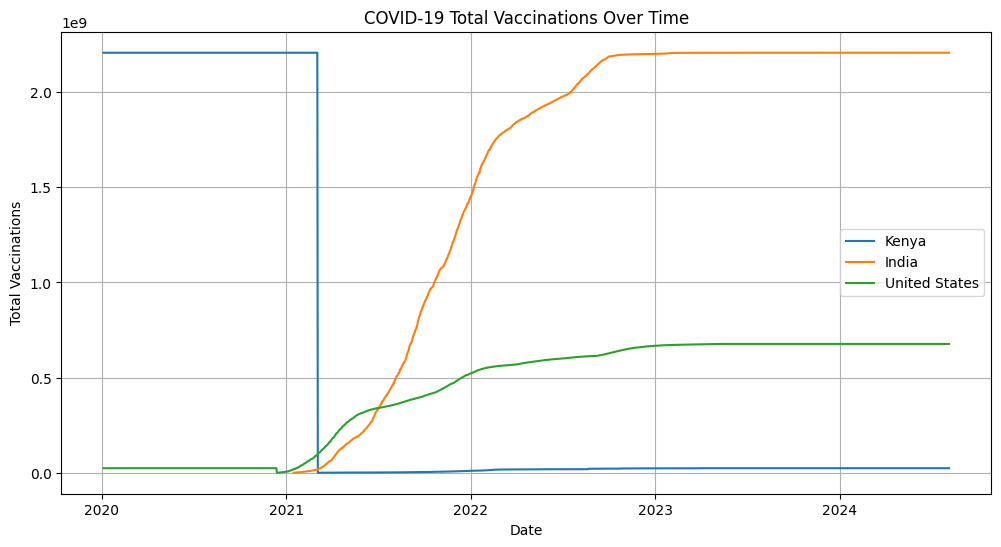

In [8]:
# Total vaccinations over time
plt.figure(figsize=(12,6))
for country in countries:
    data = df_filtered[df_filtered['location'] == country]
    plt.plot(data['date'], data['total_vaccinations'], label=country)
plt.title('COVID-19 Total Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.grid()
plt.show()

## Step 6: Choropleth Map

We can visualize the global spread of COVID-19 using a choropleth map to show total cases or vaccination rates.

We will use the most recent data for this visualization.

In [11]:
import plotly.express as px

latest_date = df['date'].max()
latest_df = df[df['date'] == latest_date]

fig = px.choropleth(latest_df,
                    locations='iso_code',
                    color='total_cases',
                    hover_name='location',
                    color_continuous_scale='Reds',
                    title='Global COVID-19 Total Cases')
fig.show()

## Step 7: Insights & Reporting

Summarize the key findings from the data analysis and visualizations.

- The United States has consistently led in total reported cases.
- India experienced a major spike in 2021.
- Kenya shows significantly fewer cases but also lower vaccination rates.
- Death rates vary across countries and time, affected by healthcare capacity and vaccine availability.
- Vaccination efforts ramped up globally by mid-2021, but disparities remain.